In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import datetime
import operator
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_excel('Lab Challanging Task-1.xlsx' , skiprows=2)

In [3]:
df.head()

,Unnamed: 0,From Date,To Date,PM10,PM2.5,NO2,SO2
0,NaN,10-11-2015 00:00,"Police Commissionerate ,JPR",274.73,186.22,None,7.75
1,NaN,16-11-2015 00:00,"Police Commissionerate ,JPR",354.85,216.60,35.89,15.94
2,NaN,17-11-2015 00:00,"Police Commissionerate ,JPR",215.43,111.54,37.17,16.95
3,NaN,18-11-2015 00:00,"Police Commissionerate ,JPR",264.47,169.63,37.99,26.73
4,NaN,20-11-2015 00:00,"Police Commissionerate ,JPR",269.42,177.20,40.64,9.13


In [4]:
df2=df

In [5]:
df2= df2.drop('Unnamed: 0' , axis=1)
df2


,From Date,To Date,PM10,PM2.5,NO2,SO2
0,10-11-2015 00:00,"Police Commissionerate ,JPR",274.73,186.22,None,7.75
1,16-11-2015 00:00,"Police Commissionerate ,JPR",354.85,216.60,35.89,15.94
2,17-11-2015 00:00,"Police Commissionerate ,JPR",215.43,111.54,37.17,16.95
3,18-11-2015 00:00,"Police Commissionerate ,JPR",264.47,169.63,37.99,26.73
4,20-11-2015 00:00,"Police Commissionerate ,JPR",269.42,177.20,40.64,9.13
...,...,...,...,...,...,...
953,26-06-2019 00:00,"Police Commissionerate ,JPR",108.76,56.66,56.84,8.95
954,27-06-2019 00:00,"Police Commissionerate ,JPR",272.08,91.20,37.42,7.69
955,28-06-2019 00:00,"Police Commissionerate ,JPR",156.55,59.84,27.69,7.95
956,29-06-2019 00:00,"Police Commissionerate ,JPR",97.74,41.59,29.41,4.93


In [6]:
df3=df2.replace('None' ,0)
df3


,From Date,To Date,PM10,PM2.5,NO2,SO2
0,10-11-2015 00:00,"Police Commissionerate ,JPR",274.73,186.22,0.00,7.75
1,16-11-2015 00:00,"Police Commissionerate ,JPR",354.85,216.60,35.89,15.94
2,17-11-2015 00:00,"Police Commissionerate ,JPR",215.43,111.54,37.17,16.95
3,18-11-2015 00:00,"Police Commissionerate ,JPR",264.47,169.63,37.99,26.73
4,20-11-2015 00:00,"Police Commissionerate ,JPR",269.42,177.20,40.64,9.13
...,...,...,...,...,...,...
953,26-06-2019 00:00,"Police Commissionerate ,JPR",108.76,56.66,56.84,8.95
954,27-06-2019 00:00,"Police Commissionerate ,JPR",272.08,91.20,37.42,7.69
955,28-06-2019 00:00,"Police Commissionerate ,JPR",156.55,59.84,27.69,7.95
956,29-06-2019 00:00,"Police Commissionerate ,JPR",97.74,41.59,29.41,4.93


In [7]:
no2mean=np.mean(df3['NO2'])
df3=df3.replace(0, no2mean)
df3


,From Date,To Date,PM10,PM2.5,NO2,SO2
0,10-11-2015 00:00,"Police Commissionerate ,JPR",274.73,186.22,38.569207,7.75
1,16-11-2015 00:00,"Police Commissionerate ,JPR",354.85,216.60,35.890000,15.94
2,17-11-2015 00:00,"Police Commissionerate ,JPR",215.43,111.54,37.170000,16.95
3,18-11-2015 00:00,"Police Commissionerate ,JPR",264.47,169.63,37.990000,26.73
4,20-11-2015 00:00,"Police Commissionerate ,JPR",269.42,177.20,40.640000,9.13
...,...,...,...,...,...,...
953,26-06-2019 00:00,"Police Commissionerate ,JPR",108.76,56.66,56.840000,8.95
954,27-06-2019 00:00,"Police Commissionerate ,JPR",272.08,91.20,37.420000,7.69
955,28-06-2019 00:00,"Police Commissionerate ,JPR",156.55,59.84,27.690000,7.95
956,29-06-2019 00:00,"Police Commissionerate ,JPR",97.74,41.59,29.410000,4.93


In [8]:
df3.describe()

,PM10,PM2.5,NO2,SO2
count,958.000000,958.000000,958.000000,958.000000
mean,161.490113,83.108121,38.730247,11.197182
std,66.745580,45.058468,31.122414,7.162558
min,0.040000,11.500000,0.010000,0.170000
25%,112.182500,51.680000,22.845000,8.002500
50%,152.910000,71.975000,30.170000,9.635000
75%,197.790000,102.925000,45.642500,11.962500
max,471.720000,360.010000,344.940000,98.160000


<AxesSubplot:>

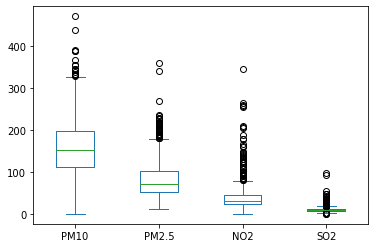

In [9]:
df3.plot.box()

In [10]:
np.mean(df3)

C:\Users\91883\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\91883\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


PM10     161.490113
PM2.5     83.108121
NO2       38.730247
SO2       11.197182
dtype: float64

In [11]:
np.std(df3)

C:\Users\91883\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


PM10     66.710735
PM2.5    45.034945
NO2      31.106166
SO2       7.158819
dtype: float64

In [12]:
np.correlate(df3['NO2'] , df3['SO2'])

array([417500.57735157])

In [13]:
NO2_Maxi = np.max(df3['NO2'])
SO2_Maxi= np.max(df3['SO2'])
PM25_Maxi= np.max(df3['PM2.5'])
PM10_Maxi= np.max(df3['PM10'])

In [14]:
df3['NO2'] = (df3["NO2"]/NO2_Maxi)
df3['SO2'] = (df3["NO2"]/SO2_Maxi)
df3['PM2.5'] = (df3["NO2"]/PM25_Maxi)
df3['PM10'] = (df3["NO2"]/PM10_Maxi)

In [15]:
df3()

TypeError: 'DataFrame' object is not callable

In [ ]:
df3.plot.scatter(x='NO2', y='SO2')

In [ ]:
df3.plot.hist()

In [ ]:
df3.plot.scatter(x='NO2', y='SO2')

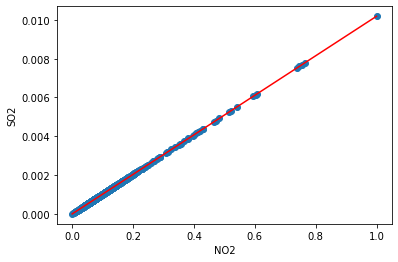

In [22]:
df4 = df3.copy()
df4.plot.scatter(x='NO2', y='SO2')
plt.scatter(df4['NO2'] , df4['SO2'])
plt.plot(np.unique(df4['NO2']), np.poly1d(np.polyfit(df4['NO2'] , df4['SO2'] ,1))
         (np.unique(df4['NO2'])), color='red')

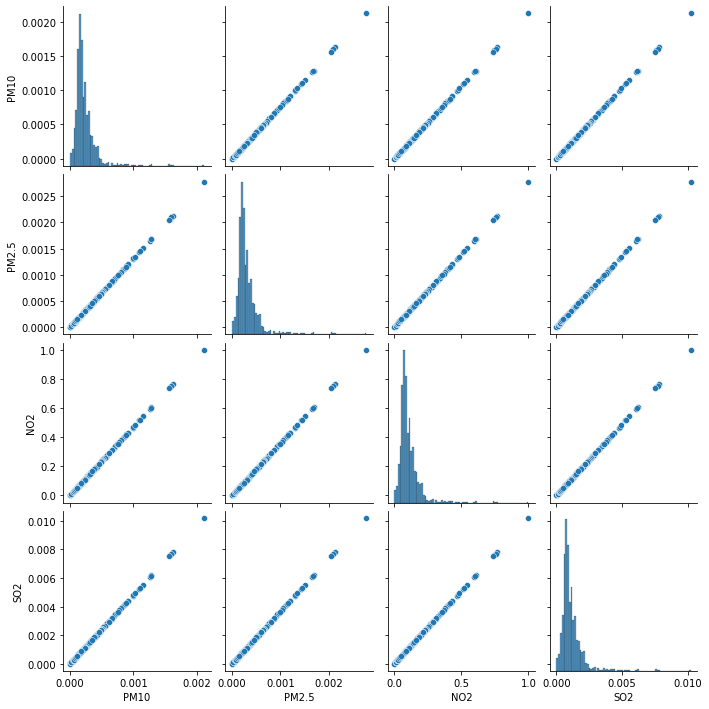

In [23]:
sns.pairplot(df3)

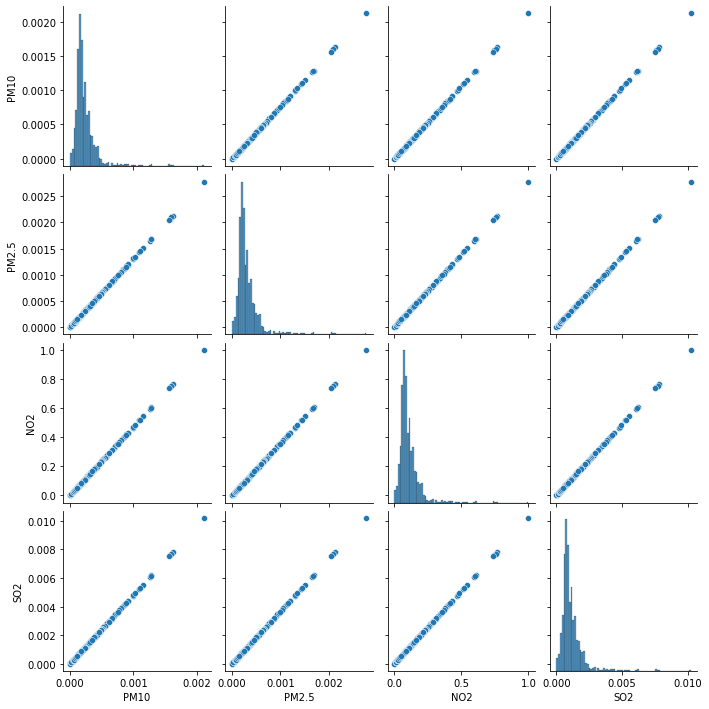

In [24]:
sns.pairplot(df4)

In [25]:
df4.head()

,From Date,To Date,PM10,PM2.5,NO2,SO2
0,10-11-2015 00:00,"Police Commissionerate ,JPR",0.000237,0.000311,0.111814,0.001139
1,16-11-2015 00:00,"Police Commissionerate ,JPR",0.000221,0.000289,0.104047,0.001060
2,17-11-2015 00:00,"Police Commissionerate ,JPR",0.000228,0.000299,0.107758,0.001098
3,18-11-2015 00:00,"Police Commissionerate ,JPR",0.000233,0.000306,0.110135,0.001122
4,20-11-2015 00:00,"Police Commissionerate ,JPR",0.000250,0.000327,0.117818,0.001200


In [26]:
df4 = df4.drop('To Date', axis=1)

In [27]:
df4

,From Date,PM10,PM2.5,NO2,SO2
0,10-11-2015 00:00,0.000237,0.000311,0.111814,0.001139
1,16-11-2015 00:00,0.000221,0.000289,0.104047,0.001060
2,17-11-2015 00:00,0.000228,0.000299,0.107758,0.001098
3,18-11-2015 00:00,0.000233,0.000306,0.110135,0.001122
4,20-11-2015 00:00,0.000250,0.000327,0.117818,0.001200
...,...,...,...,...,...
953,26-06-2019 00:00,0.000349,0.000458,0.164782,0.001679
954,27-06-2019 00:00,0.000230,0.000301,0.108483,0.001105
955,28-06-2019 00:00,0.000170,0.000223,0.080275,0.000818
956,29-06-2019 00:00,0.000181,0.000237,0.085261,0.000869


In [28]:
df5 = df4.copy()

In [29]:
dates = np.array(df5["From Date"])
dates

array(['10-11-2015 00:00', '16-11-2015 00:00', '17-11-2015 00:00',
       '18-11-2015 00:00', '20-11-2015 00:00', '21-11-2015 00:00',
       '22-11-2015 00:00', '23-11-2015 00:00', '24-11-2015 00:00',
       '25-11-2015 00:00', '26-11-2015 00:00', '27-11-2015 00:00',
       '28-11-2015 00:00', '29-11-2015 00:00', '30-11-2015 00:00',
       '01-12-2015 00:00', '02-12-2015 00:00', '03-12-2015 00:00',
       '04-12-2015 00:00', '05-12-2015 00:00', '06-12-2015 00:00',
       '07-12-2015 00:00', '08-12-2015 00:00', '09-12-2015 00:00',
       '10-12-2015 00:00', '11-12-2015 00:00', '12-12-2015 00:00',
       '13-12-2015 00:00', '14-12-2015 00:00', '15-12-2015 00:00',
       '16-12-2015 00:00', '17-12-2015 00:00', '18-12-2015 00:00',
       '21-12-2015 00:00', '22-12-2015 00:00', '23-12-2015 00:00',
       '24-12-2015 00:00', '25-12-2015 00:00', '26-12-2015 00:00',
       '29-12-2015 00:00', '30-12-2015 00:00', '31-12-2015 00:00',
       '01-01-2016 00:00', '02-01-2016 00:00', '04-01-2016 00:

In [30]:
total_days = np.array([i for i in range(len(dates))]).reshape(-1, 1)
total_days

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [31]:
# Future forecasting for the next 10 days

days_in_future = 15
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-15]

In [32]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [33]:
import datetime
start = '15/11/2015'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

In [34]:
import datetime
start = '15/11/2015'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
real_dates = []
for i in range(len(total_days)):
    real_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))
df5["From Date"] = real_dates

In [43]:
X = np.array(df5[['PM2.5','NO2','SO2']])
Y = np.array(df5[['PM10']])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((814, 3), (144, 3), (814, 1), (144, 1))

## model 

Basic Ann

In [48]:
model = tf.keras.Sequential()

# hidden layers
model.add(tf.keras.layers.Dense(3, activation='linear'))
model.add(Flatten())
model.add(tf.keras.layers.Dense(100, activation='linear'))
model.add(tf.keras.layers.Dense(100, activation='linear'))
# output layer
model.add(tf.keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=["accuracy"])
model.fit(X_train, y_train, epochs=100)
          

Epoch 1/100
26/26 [==============================] - 1s 3ms/step - loss: 3.4062e-04 - accuracy: 0.0000e+00
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 3.9705e-05 - accuracy: 0.0000e+00
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 4.0644e-06 - accuracy: 0.0000e+00
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 3.2195e-07 - accuracy: 0.0000e+00
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 2.7168e-08 - accuracy: 0.0000e+00
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 5.9581e-09 - accuracy: 0.0000e+00
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 1.3153e-09 - accuracy: 0.0000e+00
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 9.6031e-10 - accuracy: 0.0000e+00
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 7.9756e-10 - accuracy: 0.0000e+00
Epoch 10/100
26/26 [=================

26/26 [==============================] - 0s 3ms/step - loss: 6.5946e-17 - accuracy: 0.0000e+00
Epoch 77/100
26/26 [==============================] - 0s 3ms/step - loss: 4.4202e-17 - accuracy: 0.0000e+00
Epoch 78/100
26/26 [==============================] - 0s 3ms/step - loss: 1.4050e-16 - accuracy: 0.0000e+00
Epoch 79/100
26/26 [==============================] - 0s 3ms/step - loss: 4.7900e-16 - accuracy: 0.0000e+00
Epoch 80/100
26/26 [==============================] - 0s 3ms/step - loss: 1.2438e-16 - accuracy: 0.0000e+00
Epoch 81/100
26/26 [==============================] - 0s 3ms/step - loss: 8.8583e-17 - accuracy: 0.0000e+00
Epoch 82/100
26/26 [==============================] - 0s 4ms/step - loss: 6.1861e-17 - accuracy: 0.0000e+00
Epoch 83/100
26/26 [==============================] - 0s 4ms/step - loss: 4.0105e-17 - accuracy: 0.0000e+00
Epoch 84/100
26/26 [==============================] - 0s 4ms/step - loss: 6.8618e-17 - accuracy: 0.0000e+00
Epoch 85/100
26/26 [=====================

MAE: 3.798343905243676e-07
MSE: 1.4434355023098756e-13


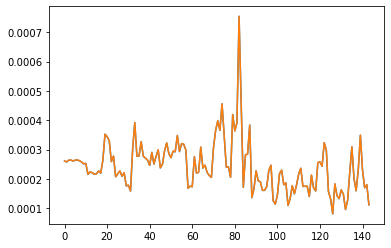

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred = model.predict(X_test)
plt.plot(pred)
plt.plot(y_test)
print('MAE:', mean_absolute_error(pred, y_test))
print('MSE:',mean_squared_error(pred, y_test))

In [50]:
y_test


array([[2.61561471e-04],
       [2.58058415e-04],
       [2.64204126e-04],
       [2.64142669e-04],
       [2.61377099e-04],
       [2.63896841e-04],
       [2.64634326e-04],
       [2.62176042e-04],
       [2.57996958e-04],
       [2.51543961e-04],
       [2.53080389e-04],
       [2.15591550e-04],
       [2.23888261e-04],
       [2.21184148e-04],
       [2.15960293e-04],
       [2.17496721e-04],
       [2.27145488e-04],
       [2.19832091e-04],
       [2.63466641e-04],
       [3.52579454e-04],
       [3.44467115e-04],
       [3.30086151e-04],
       [2.59103186e-04],
       [2.77970520e-04],
       [2.07479212e-04],
       [2.17619635e-04],
       [2.27391316e-04],
       [2.09200011e-04],
       [2.21122691e-04],
       [1.76443370e-04],
       [1.78532912e-04],
       [1.58559350e-04],
       [3.01508594e-04],
       [3.92465120e-04],
       [2.77355948e-04],
       [2.78154891e-04],
       [3.27320581e-04],
       [2.77724691e-04],
       [2.71087323e-04],
       [2.64265583e-04],


In [51]:
pred

array([[2.6118610e-04],
       [2.5767850e-04],
       [2.6382686e-04],
       [2.6376563e-04],
       [2.6100007e-04],
       [2.6351440e-04],
       [2.6425667e-04],
       [2.6179658e-04],
       [2.5761983e-04],
       [2.5116437e-04],
       [2.5270478e-04],
       [2.1520878e-04],
       [2.2350663e-04],
       [2.2080149e-04],
       [2.1557631e-04],
       [2.1711450e-04],
       [2.2676510e-04],
       [2.1945119e-04],
       [2.6308716e-04],
       [3.5220798e-04],
       [3.4409616e-04],
       [3.2971561e-04],
       [2.5872345e-04],
       [2.7759344e-04],
       [2.0709696e-04],
       [2.1723872e-04],
       [2.2700689e-04],
       [2.0881782e-04],
       [2.2073909e-04],
       [1.7605767e-04],
       [1.7814605e-04],
       [1.5817212e-04],
       [3.0113984e-04],
       [3.9209280e-04],
       [2.7697760e-04],
       [2.7777714e-04],
       [3.2694585e-04],
       [2.7735013e-04],
       [2.7071516e-04],
       [2.6388600e-04],
       [2.4612661e-04],
       [2.901958

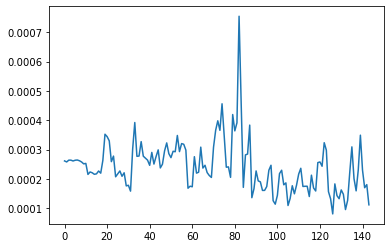

In [52]:
plt.plot(pred)

## Time series model 1
cnn

In [53]:
Y = df5[['PM10']]
X = total_days 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((814, 1), (144, 1), (814, 1), (144, 1))

In [423]:

model1 = Sequential()
model1.add(Conv1D(64, 1, activation="linear", input_shape= (1,1)))
model1.add(Flatten())
model1.add(Dense(100, activation="relu"))
model1.add(Dense(49, activation="linear"))
model1.add(Dense(100, activation="relu"))
model1.add(Dense(1, activation = "linear"))
model1.summary()

Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 1, 64)             128       
                                                                 
 flatten_96 (Flatten)        (None, 64)                0         
                                                                 
 dense_443 (Dense)           (None, 100)               6500      
                                                                 
 dense_444 (Dense)           (None, 49)                4949      
                                                                 
 dense_445 (Dense)           (None, 100)               5000      
                                                                 
 dense_446 (Dense)           (None, 1)                 101       
                                                                 
Total params: 16,678
Trainable params: 16,678
Non-tra

In [424]:
model1.compile(optimizer='adam',loss='mean_squared_error',metrics=["accuracy"])

In [425]:
model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
26/26 [==============================] - 0s 3ms/step - loss: 205.4123 - accuracy: 0.0000e+00
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 10.3919 - accuracy: 0.0000e+00
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 1.1081 - accuracy: 0.0000e+00
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.0000e+00
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 2.3012e-04 - accuracy: 0.0000e+00
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 2.3016e-05 - accuracy: 0.0000e+00
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 3.9717e-06 - accuracy: 0.0000e+00
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 2.3883e-06 - accuracy: 0.0000e+00
Epoch 10/100
26/26 [==============================] - 

26/26 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 78/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 79/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 80/100
26/26 [==============================] - 0s 2ms/step - loss: 2.4743e-04 - accuracy: 0.0000e+00
Epoch 81/100
26/26 [==============================] - 0s 2ms/step - loss: 2.8419e-04 - accuracy: 0.0000e+00
Epoch 82/100
26/26 [==============================] - 0s 2ms/step - loss: 1.2801e-04 - accuracy: 0.0000e+00
Epoch 83/100
26/26 [==============================] - 0s 1ms/step - loss: 2.0865e-04 - accuracy: 0.0000e+00
Epoch 84/100
26/26 [==============================] - 0s 1ms/step - loss: 1.7218e-04 - accuracy: 0.0000e+00
Epoch 85/100
26/26 [==============================] - 0s 2ms/step - loss: 1.0639e-04 - accuracy: 0.0000e+00
Epoch 86/100
26/26 [==============================] -

MAE: 0.011342631182443247
MSE: 0.00012897330535662218


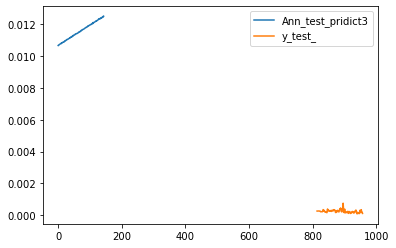

In [430]:
pred1 = model1.predict(X_test)
plt.plot(pred1)
plt.plot(y_test)
plt.legend(["Ann_test_pridict3","y_test_"])
print('MAE:', mean_absolute_error(pred1, y_test))
print('MSE:',mean_squared_error(pred1, y_test))

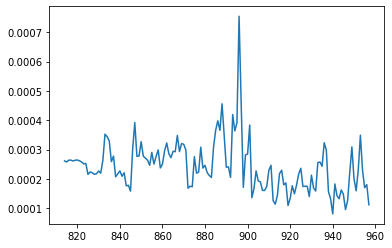

In [431]:
plt.plot(y_test)

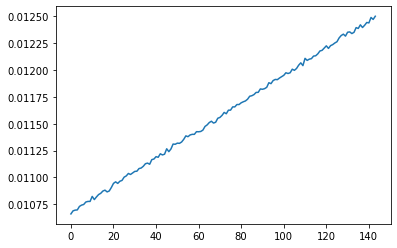

In [432]:
plt.plot(pred1)

## model 3

updated model for time series

In [295]:
model3 = tf.keras.Sequential()


# hidden layers
model3.add(tf.keras.layers.Dense(1, activation='linear', input_dim =1))
model3.add(Flatten())
model3.add(tf.keras.layers.Dense(67, activation='relu'))

# output layer
model3.add(tf.keras.layers.Dense(1, activation='linear'))
optim1 = tf.keras.optimizers.Adamax(learning_rate = 0.5, beta_1 = 0.9, beta_2 = 0.999)
model3.compile(optimizer='adam',loss='mean_squared_error',metrics=["accuracy"])
model3.fit(X_train, y_train, epochs=100)


Epoch 1/100
26/26 [==============================] - 0s 2ms/step - loss: 57.2938 - accuracy: 0.0000e+00
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 2.8224 - accuracy: 0.0000e+00
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.0000e+00
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.0000e+00
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 1.9738e-04 - accuracy: 0.0000e+00
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 1.2957e-04 - accuracy: 0.0000e+00
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 1.2205e-04 - accuracy: 0.0000e+00
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 1.1920e-04 - accuracy: 0.0000e+00
Epoch 10/100
26/26 [==============================] - 0s

26/26 [==============================] - 0s 2ms/step - loss: 4.2186e-07 - accuracy: 0.0000e+00
Epoch 78/100
26/26 [==============================] - 0s 1ms/step - loss: 3.7359e-07 - accuracy: 0.0000e+00
Epoch 79/100
26/26 [==============================] - 0s 2ms/step - loss: 3.3949e-07 - accuracy: 0.0000e+00
Epoch 80/100
26/26 [==============================] - 0s 2ms/step - loss: 2.7257e-07 - accuracy: 0.0000e+00
Epoch 81/100
26/26 [==============================] - 0s 1ms/step - loss: 2.3760e-07 - accuracy: 0.0000e+00
Epoch 82/100
26/26 [==============================] - 0s 2ms/step - loss: 1.9055e-07 - accuracy: 0.0000e+00
Epoch 83/100
26/26 [==============================] - 0s 2ms/step - loss: 2.1217e-07 - accuracy: 0.0000e+00
Epoch 84/100
26/26 [==============================] - 0s 2ms/step - loss: 1.5052e-07 - accuracy: 0.0000e+00
Epoch 85/100
26/26 [==============================] - 0s 2ms/step - loss: 1.4901e-07 - accuracy: 0.0000e+00
Epoch 86/100
26/26 [=====================

In [435]:
model3.summary()

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_350 (Dense)           (None, 1)                 2         
                                                                 
 flatten_75 (Flatten)        (None, 1)                 0         
                                                                 
 dense_351 (Dense)           (None, 67)                134       
                                                                 
 dense_352 (Dense)           (None, 1)                 68        
                                                                 
Total params: 204
Trainable params: 204
Non-trainable params: 0
_________________________________________________________________


MAE: 0.00019180107212850503
MSE: 4.196287959359004e-08


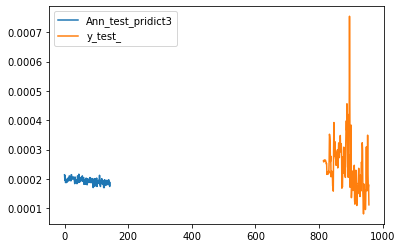

In [371]:
pred2 = model3.predict(X_test)
pd = [pred1[i][0] for i in range(len(pred1))]
plt.plot(pred2)
plt.plot(y_test)
plt.legend(["Ann_test_pridict3","y_test_"])
print('MAE:', mean_absolute_error(pred2, y_test))
print('MSE:',mean_squared_error(pred2, y_test))

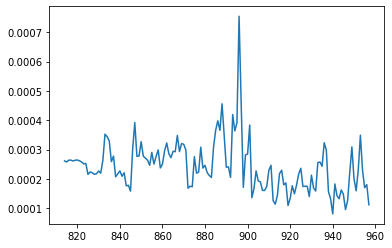

In [363]:
plt.plot(y_test)

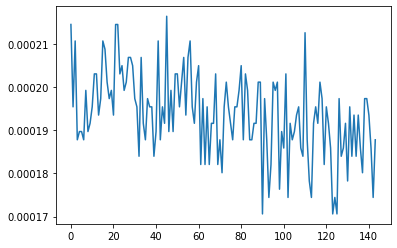

In [364]:
plt.plot(pred2)

### Overall conclution is that for the given dataset creation of a model without a time series is more easy. it is a copmlex task to create a model with time series in this case. As we can see the model having no time series is more accurate and less complex